# Testing Invariance Hypothesis with Block Deals

* https://www.jstor.org/stable/pdf/43866470.pdf?casa_token=BAuxbVI8ApYAAAAA:UfAtMDCAeMyHvp-gfDV98i4GezH7yCZl7v7f4HjdHQAn5XPxmmN9Jl_XiFdm5VisgFcLszJpehpFslg-JPPNpI2AVnZHuY1HTKf64WrlAfpGYmXdbQCp7g

## Mounting Google Drive and Setting Working Directory

In [5]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
import os
os.chdir("/content/gdrive/My Drive/99_Jinkyu/Blockdeal/")
cwd = os.getcwd()
print(cwd)
#!ls "gdrive/My Drive/99_Jinkyu/Blockdeal/day/" -al; 
#wd = "/content/gdrive/My Drive/99_Jinkyu/Blockdeal/day/"

/content/gdrive/My Drive/99_Jinkyu/Blockdeal


## Empirical Analysis

In [0]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm

## Drop Wash Trades

In [8]:
tmp1 = pd.read_sas('day/blocktrade.sas7bdat')
bet_tmp = tmp1.groupby(['date_id','stock','time2','account']).sum()['signed_vol'].reset_index()
bet_tmp = bet_tmp[bet_tmp['signed_vol'] > 0]
bet_tmp['volume'] = bet_tmp['signed_vol']
bet_tmp.head()

,date_id,stock,time2,account,signed_vol,volume
1,2.0,b'KR7000270009',55410623.0,b'211000.My8hmq/jJZ2KGEEjje6arw==',10909.0,10909.0
4,2.0,b'KR7018880005',54700404.0,b'211000.4cby7efha3YlzTlyhphJ5g==',16000.0,16000.0
6,2.0,b'KR7028260008',54864624.0,b'111000.aIgpxGnuVJiTjfSacoUVRA==',38457.0,38457.0
7,2.0,b'KR7028260008',61154568.0,b'001000.QQ5UCn9294/s4F8AdLZ1/g==',12525.0,12525.0
10,2.0,b'KR7086790003',42184657.0,b'213000.3j3ZfdaMmTDaWI5fSODC7w==',20000.0,20000.0


In [0]:
tmp1 = tmp1[tmp1['bid_ask'] == 1.0]
tmp1.head()
bet = bet_tmp.groupby(['date_id','stock']).sum()['volume'].reset_index()
wvar = tmp1.groupby(['date_id','stock']).mean()[['price','dolvol_million','shvol']].reset_index()
df = bet.merge(wvar,on=['date_id','stock'])
df['stock2'] = df['stock'].str.decode("utf-8")
tmp1['stock2'] = tmp1['stock'].str.decode("utf-8")
#tmp1['X_V'] = tmp1['price'] * tmp1['volume'] /tmp1['dolvol_million']

In [0]:
std = pd.read_csv('std.csv')
avgshvol = pd.read_csv('avgshvol.csv')
std2 = std.merge(avgshvol, on=['date_id','stock'])

In [16]:
std2['avg_shvol']

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
5                   NaN
6                   NaN
7                   NaN
8                   NaN
9                   NaN
10                  NaN
11                  NaN
12                  NaN
13                  NaN
14                  NaN
15                  NaN
16                  NaN
17                  NaN
18                  NaN
19                  NaN
20          78572.15000
21          78572.15000
22          78572.15000
23          78572.15000
24          78572.15000
25          78572.15000
26          78572.15000
27          78572.15000
28          78572.15000
29          78572.15000
               ...     
1367925      8489.47619
1367926      8489.47619
1367927      8489.47619
1367928             NaN
1367929    865998.00000
1367930    865998.00000
1367931    865998.00000
1367932    865998.00000
1367933    865998.00000
1367934    865998.00000
1367935    86599

Average daily trading volume for the stock in the previous full pre-transition calendar month

In [0]:
# print(df['stock'][0])
# print(std['stock'][17823])
# type(df['stock'][0].decode("utf-8"))
# #type(std['stock'][0])
# #df['stock'][0].decode("utf-8") == std['stock'][17823]
# df['stock2'][0] == std['stock'][17823]

In [17]:
df.head()


,date_id,stock,volume,price,dolvol_million,shvol,stock2
0,2.0,b'KR7000270009',10909.0,51900.0,6.755195e+04,651419.0,KR7000270009
1,2.0,b'KR7018880005',16000.0,48252.0,8.442386e+03,87748.0,KR7018880005
2,2.0,b'KR7028260008',50982.0,145500.0,2.043911e+06,6436685.0,KR7028260008
3,2.0,b'KR7086790003',36308.0,31250.0,5.988277e+04,957397.0,KR7086790003
4,2.0,b'KR7092440007',17713.0,7100.0,4.793568e+02,33763.0,KR7092440007


In [18]:
df2 = df.merge(std2,left_on=['date_id','stock2'],right_on=['date_id','stock'])
tmp2 = tmp1.merge(std2,left_on=['date_id','stock2'],right_on=['date_id','stock'])
tmp2.head()

,date_id,stock_x,price,volume,time,time2,blockcode,timecode,marketorder,bid_ask,...,movstd30,movstd60,movstd90,closing_price_y,return,shvol_y,date,month,dg,avg_shvol
0,2.0,b'KR7000270009',51900.0,10909.0,b'152330623',55410623.0,1.0,5.0,1.0,1.0,...,NaN,NaN,NaN,52000.0,NaN,651419,20150105,201501,1,NaN
1,2.0,b'KR7008560005',3940.0,8689.0,b'151222990',54742990.0,1.0,5.0,1.0,1.0,...,NaN,NaN,NaN,3935.0,NaN,634609,20150105,201501,1,NaN
2,2.0,b'KR7018880005',48252.0,16000.0,b'151140404',54700404.0,1.0,5.0,1.0,1.0,...,NaN,NaN,NaN,48500.0,NaN,87748,20150105,201501,1,NaN
3,2.0,b'KR7028260008',145500.0,38457.0,b'151424624',54864624.0,1.0,5.0,1.0,1.0,...,NaN,NaN,NaN,152000.0,NaN,6436685,20150105,201501,1,NaN
4,2.0,b'KR7028260008',145500.0,12525.0,b'165914568',61154568.0,1.0,5.0,1.0,1.0,...,NaN,NaN,NaN,152000.0,NaN,6436685,20150105,201501,1,NaN


In [19]:
df2.head()

,date_id,stock_x,volume,price,dolvol_million,shvol_x,stock2,stock_y,movstd30,movstd60,movstd90,closing_price,return,shvol_y,date,month,dg,avg_shvol
0,2.0,b'KR7000270009',10909.0,51900.0,6.755195e+04,651419.0,KR7000270009,KR7000270009,NaN,NaN,NaN,52000.0,NaN,651419,20150105,201501,1,NaN
1,2.0,b'KR7018880005',16000.0,48252.0,8.442386e+03,87748.0,KR7018880005,KR7018880005,NaN,NaN,NaN,48500.0,NaN,87748,20150105,201501,1,NaN
2,2.0,b'KR7028260008',50982.0,145500.0,2.043911e+06,6436685.0,KR7028260008,KR7028260008,NaN,NaN,NaN,152000.0,NaN,6436685,20150105,201501,1,NaN
3,2.0,b'KR7086790003',36308.0,31250.0,5.988277e+04,957397.0,KR7086790003,KR7086790003,NaN,NaN,NaN,31350.0,NaN,957397,20150105,201501,1,NaN
4,2.0,b'KR7092440007',17713.0,7100.0,4.793568e+02,33763.0,KR7092440007,KR7092440007,NaN,NaN,NaN,7100.0,NaN,33763,20150105,201501,1,NaN


In [20]:
list(tmp2.columns)

['date_id',
 'stock_x',
 'price',
 'volume',
 'time',
 'time2',
 'blockcode',
 'timecode',
 'marketorder',
 'bid_ask',
 'order_accept_time',
 'broker_order_time',
 'self_trading',
 'order_media',
 'account',
 'bid_price_step1',
 'bid_quantity_step1',
 'ask_price_step1',
 'ask_quantity_step1',
 'signed_vol',
 'broker_code',
 'closing_price_x',
 'intravol',
 'oibnum',
 'oibnum_percent',
 'oibsh',
 'oibsh_percent',
 'oibdol',
 'oibdol_percent',
 'dollar_quoted_spread',
 'percent_quoted_spread',
 'dollar_effective_spread',
 'percent_effective_spread',
 'vwap',
 'depth',
 'shvol_x',
 'dolvol_million',
 'shrout',
 'yes_closing_price',
 'stock2',
 'stock_y',
 'movstd30',
 'movstd60',
 'movstd90',
 'closing_price_y',
 'return',
 'shvol_y',
 'date',
 'month',
 'dg',
 'avg_shvol']

### Column Defintions

* date_id: index for dates - 
    sample period: 1(20150102) to 696(20171031)
* stock: individual stock code
* price: Block Deal Price
* volume: Block Deal Volume
* time: time (format: am9=>090000000 )
* time2: transformed time to millisecond
  (am9 = 32400000, pm3 =  54000000)
* blockcode: block trading code (0:normal, 1:large, 2:basket, 7:large with competition)
* timecode: market (1:regular market, 2:before market starts, 3: after market - closing price, 4: after market - single price, 5: after market)
* marketorder: marketable order=1 o/w=0
* bid_ask: bid=1, ask=-1
* order_accept_time: order acceptance time recorded by exchange
* broker_order_time: order submission time recorded by broker
* self_trading: prop team transaction=1, o/w=0
* order_media: order media (1:broker firm network, 2:cable, 3:wireless, 4: HTS, 8:bond trading server, 9: etc.)
* account: encrypted account
* bid_price_step1: step1 bid price
* bid_quantity_step1: step1 bid quantity
* ask_price_step1: step1 askprice
* ask_quantity_step1: step1 ask quantity
* signed_vol = volume*bid_ask
* broker_code: individual broker code (about 70 firms. Refer to Excel sheet)
* closing_price: Closing price
* intravol: standard deviation of 5 minute returns
* oibnum: order imbalance (OIM) 
* oibnum_percent: OIM(number) percent
* oibsh: OIM (share)
* oibsh_percent: OIM (share) percent
* oibdol: OIM(dollor volume) 
* oibdol_percent: OIM (dollar volume) percent
* dollar_quoted_spread: daily dollar quoted spread
* percent_quoted_spread: daily percent quoted spread
* dollar_effective_spread: daily dollar effective spread
* percent_effective_spread: daily percent effective spread
* vwap: daily volume weighted average price
* depth: daily depth
* shvol:  share volume (share)
* dolvol_million: dollar volume divided by million (won)
* shrout: Share Outstanding
* yes_closing_price: yesterday's closing price

(NOTE: Order Imbalance is miscalculated.(update soon) Not necessary for this project)

### Kyle and Obizeva (2016)

$$ln(X_i/V_i) = -5.71 -2/3 \cdot ln(W_i/W^*) $$

In [0]:
# Setting Benchmark portfolio
# W_star = 47440 * (10**6) * 0.02
W_star = 47440 * 0.02

####  The Graphical Relationship Between Order Sizes 

In [0]:
df2['movstd'] = df2['movstd60']  
df3 = df2[df2['movstd'] != 0].reset_index()

In [0]:
tmp2['movstd'] = tmp2['movstd60']  
tmp3 = tmp2[tmp2['movstd'] != 0].reset_index()

In [24]:
df3.head()

,index,date_id,stock_x,volume,price,dolvol_million,shvol_x,stock2,stock_y,movstd30,movstd60,movstd90,closing_price,return,shvol_y,date,month,dg,avg_shvol,movstd
0,0,2.0,b'KR7000270009',10909.0,51900.0,6.755195e+04,651419.0,KR7000270009,KR7000270009,NaN,NaN,NaN,52000.0,NaN,651419,20150105,201501,1,NaN,NaN
1,1,2.0,b'KR7018880005',16000.0,48252.0,8.442386e+03,87748.0,KR7018880005,KR7018880005,NaN,NaN,NaN,48500.0,NaN,87748,20150105,201501,1,NaN,NaN
2,2,2.0,b'KR7028260008',50982.0,145500.0,2.043911e+06,6436685.0,KR7028260008,KR7028260008,NaN,NaN,NaN,152000.0,NaN,6436685,20150105,201501,1,NaN,NaN
3,3,2.0,b'KR7086790003',36308.0,31250.0,5.988277e+04,957397.0,KR7086790003,KR7086790003,NaN,NaN,NaN,31350.0,NaN,957397,20150105,201501,1,NaN,NaN
4,4,2.0,b'KR7092440007',17713.0,7100.0,4.793568e+02,33763.0,KR7092440007,KR7092440007,NaN,NaN,NaN,7100.0,NaN,33763,20150105,201501,1,NaN,NaN


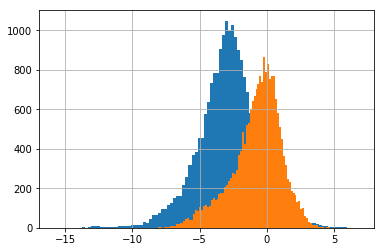

In [25]:
df3['X_V'] = df3['volume'] /df3['avg_shvol']
df3['log_X_V'] = np.log(df3['X_V'])
df3['log_W'] = np.log(df3['dolvol_million']*df3['movstd']/W_star)
df3['log_X_V'].hist(bins=100)
df3['log_W'].hist(bins=100)

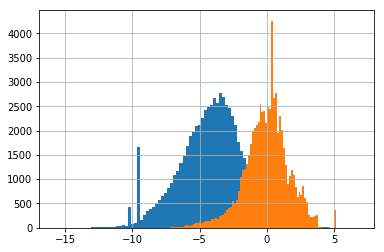

In [27]:
tmp3['X_V'] = tmp3['volume'] /tmp3['avg_shvol']
tmp3['log_X_V'] = np.log(tmp3['X_V'])
tmp3['log_W'] = np.log(tmp3['dolvol_million']*tmp3['movstd']/W_star)
tmp3['log_X_V'].hist(bins=100)
tmp3['log_W'].hist(bins=100)

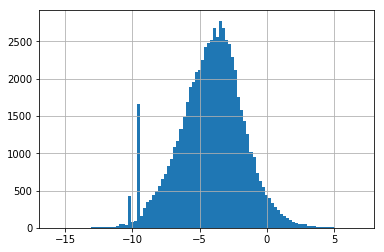

In [28]:
tmp3['log_X_V'].hist(bins=100)

In [29]:
df3['log_X_V'].describe()

count    20427.000000
mean        -2.937805
std          2.275145
min        -15.782221
25%         -4.208653
50%         -2.888987
75%         -1.656180
max          6.855309
Name: log_X_V, dtype: float64

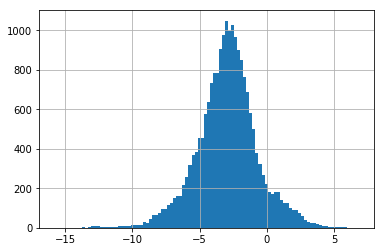

In [30]:
df3['log_X_V'].hist(bins=100)

In [31]:
np.exp(3.5)

33.11545195869231

In [32]:
df3['X_V'].describe()

count    2.042700e+04
mean     9.739333e-01
std      1.046417e+01
min      1.399164e-07
25%      1.486637e-02
50%      5.563252e-02
75%      1.908666e-01
max      9.489051e+02
Name: X_V, dtype: float64

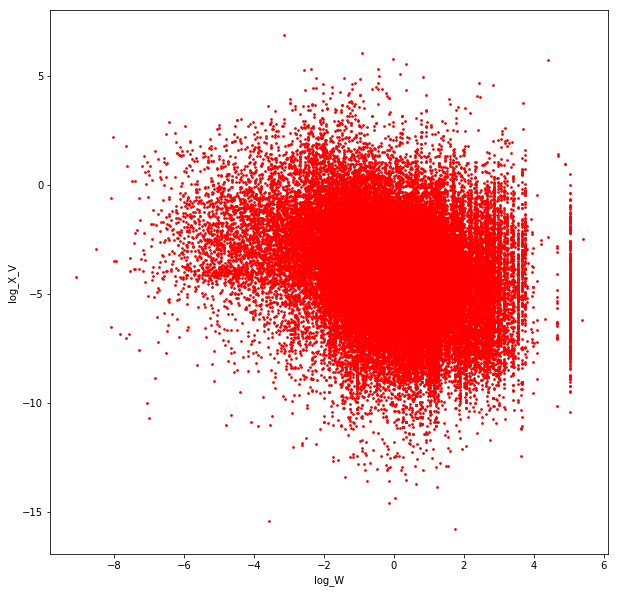

In [33]:
tmp3.plot.scatter(x='log_W',y='log_X_V',s=3,c='Red',figsize=(10,10))

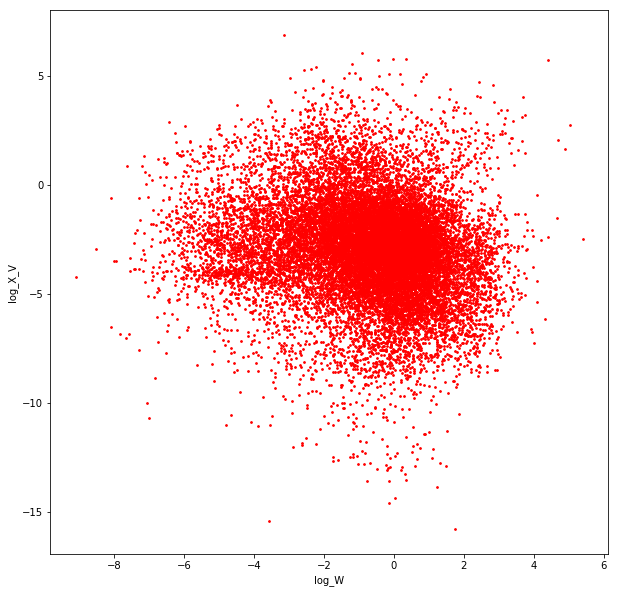

In [34]:
df3.plot.scatter(x='log_W',y='log_X_V',s=3,c='Red',figsize=(10,10))

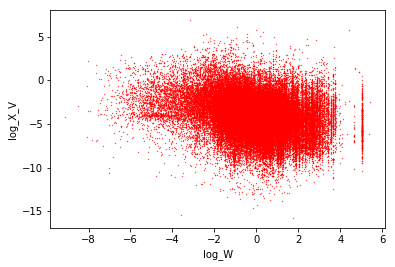

In [35]:
tmp3.plot.scatter(x='log_W',y='log_X_V',s=0.1,c='Red')

In [36]:
df3[['log_W','log_X_V']].tail()

,log_W,log_X_V
21003,2.255894,-4.053901
21004,-0.148214,-2.467947
21005,0.785901,-1.642057
21006,-3.480120,-1.232811
21007,-0.645478,-2.386507


In [37]:
tmp3[['log_W','log_X_V']].tail()

,log_W,log_X_V
67268,-0.148214,-2.467947
67269,0.785901,-4.112549
67270,0.785901,-1.730389
67271,-3.480120,-1.232811
67272,-0.645478,-2.386507


In [38]:
df3 = df3.dropna(how='any') 
df3[['log_W','log_X_V']].tail()
df3.tail()

,index,date_id,stock_x,volume,price,dolvol_million,shvol_x,stock2,stock_y,movstd30,...,return,shvol_y,date,month,dg,avg_shvol,movstd,X_V,log_X_V,log_W
21003,21029,696.0,b'KR7090430000',4749.0,315585.0,373567.043330,584010.0,KR7090430000,KR7090430000,0.028525,...,-0.038339,584010,20171031,201710,34,273646.000000,0.024240,0.017355,-4.053901,2.255894
21004,21030,696.0,b'KR7161890009',16273.0,82700.0,33320.992000,199288.0,KR7161890009,KR7161890009,0.025922,...,-0.023867,199288,20171031,201710,34,191992.142860,0.024552,0.084759,-2.467947,-0.148214
21005,21031,696.0,b'KR7204320006',8954.0,330374.0,82515.651592,125495.0,KR7204320006,KR7204320006,0.029112,...,0.004605,125495,20171031,201710,34,46254.428571,0.025232,0.193581,-1.642057,0.785901
21006,21032,696.0,b'KR7237880000',4618.0,34159.0,1546.581424,22638.0,KR7237880000,KR7237880000,0.023856,...,-0.010287,22638,20171031,201710,34,15843.714286,0.018898,0.291472,-1.232811,-3.480120
21007,21033,696.0,b'KR7240810002',29387.0,35725.0,18403.864850,256189.0,KR7240810002,KR7240810002,0.027986,...,0.026594,256189,20171031,201710,34,319596.523810,0.027036,0.091950,-2.386507,-0.645478


In [39]:
tmp3 = tmp3.dropna(how='any') 
tmp3[['log_W','log_X_V']].tail()
tmp3.tail()

,index,date_id,stock_x,price,volume,time,time2,blockcode,timecode,marketorder,...,return,shvol_y,date,month,dg,avg_shvol,movstd,X_V,log_X_V,log_W
67268,67336,696.0,b'KR7161890009',82700.0,16273.0,b'160131681',57691681.0,1.0,5.0,1.0,...,-0.023867,199288,20171031,201710,34,191992.142860,0.024552,0.084759,-2.467947,-0.148214
67269,67337,696.0,b'KR7204320006',330374.0,757.0,b'132115624',48075624.0,1.0,1.0,1.0,...,0.004605,125495,20171031,201710,34,46254.428571,0.025232,0.016366,-4.112549,0.785901
67270,67338,696.0,b'KR7204320006',330374.0,8197.0,b'132115624',48075624.0,1.0,1.0,1.0,...,0.004605,125495,20171031,201710,34,46254.428571,0.025232,0.177215,-1.730389,0.785901
67271,67339,696.0,b'KR7237880000',34159.0,4618.0,b'154823880',56903880.0,1.0,5.0,1.0,...,-0.010287,22638,20171031,201710,34,15843.714286,0.018898,0.291472,-1.232811,-3.480120
67272,67340,696.0,b'KR7240810002',35725.0,29387.0,b'102057787',37257787.0,1.0,1.0,1.0,...,0.026594,256189,20171031,201710,34,319596.523810,0.027036,0.091950,-2.386507,-0.645478


#### Regression Analysis

In [40]:
result = sm.ols(formula="log_X_V ~ log_W", data=df3).fit()
print(result.params)
print(result.summary())

Intercept   -3.080708
log_W       -0.186140
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                log_X_V   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     477.0
Date:                Thu, 18 Apr 2019   Prob (F-statistic):          1.51e-104
Time:                        07:25:03   Log-Likelihood:                -45521.
No. Observations:               20420   AIC:                         9.105e+04
Df Residuals:                   20418   BIC:                         9.106e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


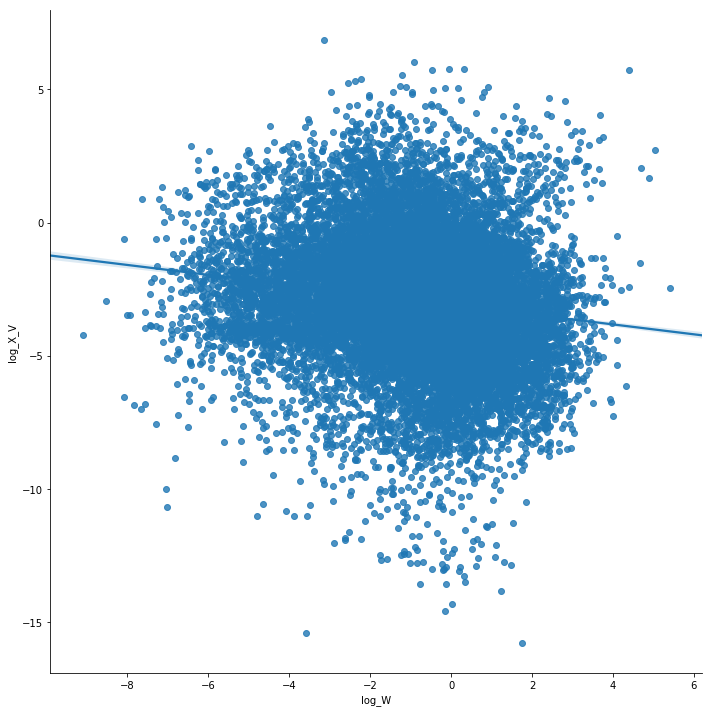

In [42]:
#https://seaborn.pydata.org/tutorial/regression.html
sns.lmplot(x='log_W',y='log_X_V',data=df3,fit_reg=True,size=10) 

In [43]:
result = sm.ols(formula="log_X_V ~ log_W", data=tmp3).fit()
print(result.params)
print(result.summary())

Intercept   -4.203038
log_W       -0.317516
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                log_X_V   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     3140.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        07:26:07   Log-Likelihood:            -1.3897e+05
No. Observations:               60784   AIC:                         2.779e+05
Df Residuals:                   60782   BIC:                         2.780e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


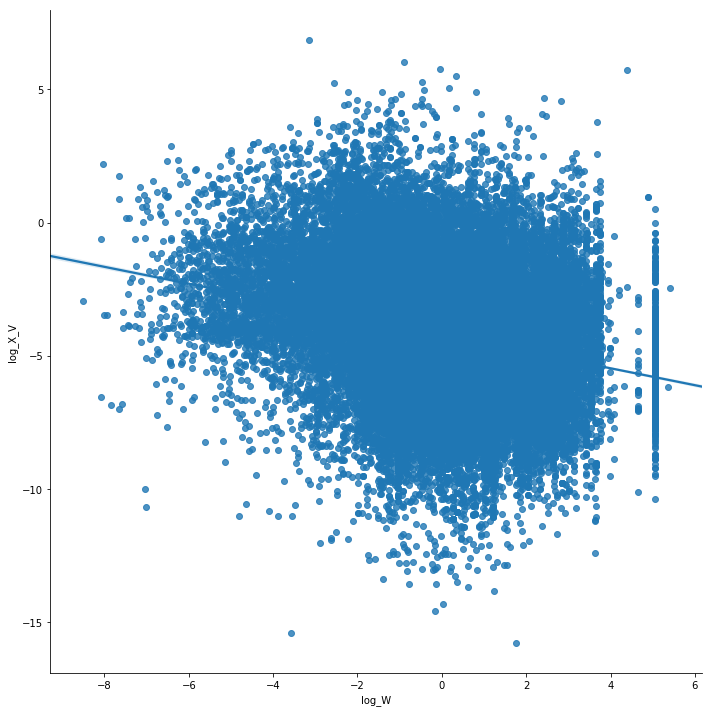

In [44]:
#https://seaborn.pydata.org/tutorial/regression.html
sns.lmplot(x='log_W',y='log_X_V',data=tmp3,fit_reg=True,size=10) 

####  Log-Normal Order Size Distribution for Volatility Groups

$$ log(X_i/V_i) + 2/3 log(W_i / W^*)$$

In [0]:
#tmp1['invariance'] = tmp1['log_X_V'] + 2/3* tmp1['log_W']
df3['invariance'] = df3['log_X_V'] + 2/3* df3['log_W']

In [0]:
#tmp1['invariance'] = tmp1['log_X_V'] + 2/3* tmp1['log_W']
tmp3['invariance'] = tmp3['log_X_V'] + 2/3* tmp3['log_W']

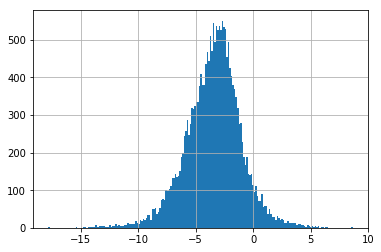

In [51]:
df3['invariance'].hist(bins=200)

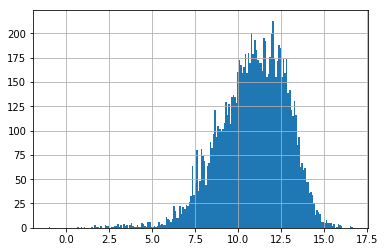

In [0]:
tmp1['invariance'].hist(bins=200)

## Column Defintions

* date_id: 일 수(1-696)
* stock: 주식코드
* price: Block Deal Price
* volume: Block Deal Volume
* time: 시간 (090000.000ms 단위로 )
* time2: millisecond로 변환한 시간 (32400000 - 54000000)
* blockcode: 대량매매 구분코드 (0:일반거래, 1:대량, 2:바스켓, 7:경쟁대량)
* timecode: 정규시간외 구분코드(1:정규장, 2:장개시전 시간외, 3: 장종료후 시간외 종가, 4:장종료후 시간외단일가, 5:장종료후 시간외)
* marketorder: bid order의 경우 bid order acceptance time이 더 늦었을 때 marketorder=1 o/w=0, ask order의 경우 ask order의 acceptance time이 더 늦었을 때 marketorder=1 o/w=0.
* bid_ask: bid=1, ask=-1
* order_accept_time: 주문받은시간
* broker_order_time: 브로커가 주문넣었다고 신고한 시각
* self_trading: 위탁거래=0, 자기계좌거래=1
* order_media: 주문매체 구분코드 (1:영업점단말, 2:유선단말, 3:무선단말, 4: HTS, 8:채권주문서버, 9:기타)
* account: 암호화된 계좌
* bid_price_step1: step1 bid price
* bid_quantity_step1: step1 bid quantity
* ask_price_step1: step1 askprice
* ask_quantity_step1: step1 ask quantity
* signed_vol = volume*bid_ask
* broker_code: 브로커구분코드 (총 70개가량 있음 - 자세한 내용은 엑셀시트 참조)
* closing_price: 당일 종가
* intravol: 일중 5분 수익률로 계산한 std deviation
* oibnum: order imbalance (OIM) 
* oibnum_percent: OIM(거래횟수) percent
* oibsh: OIM (share)
* oibsh_percent: OIM (share) percent
* oibdol: OIM(dollor volume) 
* oibdol_percent: OIM (dollar volume) percent
* dollar_quoted_spread: 일중 주식의 dollar quoted spread
* percent_quoted_spread: 일중 주식의 percent quoted spread
* dollar_effective_spread: 일중 주식의 dollar effective spread
* percent_effective_spread: 일중 주식의 percent effective spread
* vwap: 일중 주식의 volume weighted price
* depth: 일중 주식의 bid_ask에 걸려있는 quantity의 volume weighted average
* shvol: 일중 특정 주식의 총 거래량 (share)
* dolvol_million: 일중 특정 주식의 dollor volume을 백만으로 나눈 것
* shrout: Share Outstanding
* yes_closing_price: 어제의 종가

(NOTE: Order Imbalance는 raw file에서 계산해올때 잘못계산한 부분이 발견되었습니다. 이번 분석에서는 쓰이지 않습니다. 추후에 업데이트 예정입니다.)

In [0]:
# import directory file names
alldeal=os.listdir(wd)
for i in alldeal:
  print(i)

blktrd2.sas7bdat
blktrd3.sas7bdat
blktrd4.sas7bdat
blktrd5.sas7bdat
blktrd6.sas7bdat
blktrd7.sas7bdat
blktrd8.sas7bdat
blktrd9.sas7bdat
blktrd10.sas7bdat
blktrd11.sas7bdat
blktrd12.sas7bdat
blktrd13.sas7bdat
blktrd14.sas7bdat
blktrd15.sas7bdat
blktrd16.sas7bdat
blktrd17.sas7bdat
blktrd18.sas7bdat
blktrd19.sas7bdat
blktrd20.sas7bdat
blktrd21.sas7bdat
blktrd22.sas7bdat
blktrd23.sas7bdat
blktrd24.sas7bdat
blktrd25.sas7bdat
blktrd26.sas7bdat
blktrd27.sas7bdat
blktrd28.sas7bdat
blktrd29.sas7bdat
blktrd30.sas7bdat
blktrd31.sas7bdat
blktrd32.sas7bdat
blktrd33.sas7bdat
blktrd34.sas7bdat
blktrd35.sas7bdat
blktrd36.sas7bdat
blktrd37.sas7bdat
blktrd38.sas7bdat
blktrd39.sas7bdat
blktrd40.sas7bdat
blktrd41.sas7bdat
blktrd42.sas7bdat
blktrd43.sas7bdat
blktrd44.sas7bdat
blktrd45.sas7bdat
blktrd46.sas7bdat
blktrd47.sas7bdat
blktrd48.sas7bdat
blktrd49.sas7bdat
blktrd50.sas7bdat
blktrd51.sas7bdat
blktrd52.sas7bdat
blktrd53.sas7bdat
blktrd54.sas7bdat
blktrd55.sas7bdat
blktrd56.sas7bdat
blktrd57.sas7bdat


* Fix benchmark stock 

a hypothetical benchmark stock with a daily volume of one million shares, daily volatility of 2%, and price of 47,440 Korean won (KRW) per share

* Estimate volatility
Use past 60 days daily returns to estimate volatility

In [0]:
W_star = 47440 * (10**6) * 0.02